In [1]:
import phoebe
import numpy as np
from spice.models.phoebe_model import PhoebeModel

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


In [2]:
import matplotlib
%matplotlib inline

In [3]:
import astropy.units as u
u.solRad.to(u.cm)

69570000000.0

In [4]:
from phoebe.parameters.dataset import _mesh_columns

In [5]:
b = phoebe.default_star()
times = np.linspace(0, 100, 100)
COLUMNS = _mesh_columns
b.add_dataset('mesh', times=times, columns=COLUMNS, dataset='mesh01')
b.run_compute(irrad_method='none')


100%|██████████| 100/100 [00:00<00:00, 195.18it/s]


<ParameterSet: 3102 parameters | qualifiers: uvw_normals, uvw_elements, vws, nus, xyz_elements, vzs, xs, visible_centroids, rprojs, nvs, vvs, volume, us, vus, nys, times, nws, comments, zs, vxs, visibilities, vs, nzs, areas, loggs, xyz_normals, teffs, vys, rs, ys, nxs, ws, mus>

In [6]:
b.__dict__

{'_params': [<Parameter: t0=0.0 d | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: ra=0.0 deg | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: dec=0.0 deg | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: distance=1.0 m | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: vgamma=0.0 km / s | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: ebv=0.0 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: Av=0.0 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: Rv=3.1

In [7]:
from spice.models.phoebe_utils import PhoebeConfig

In [8]:
p = PhoebeConfig(b, 'mesh01')

In [9]:
p.list_quantities()

['t0',
 'ra',
 'dec',
 'distance',
 'vgamma',
 'ebv',
 'Av',
 'Rv',
 'hierarchy',
 'requiv',
 'requiv_max',
 'requiv_min',
 'teff',
 'abun',
 'logg',
 'syncpar',
 'period',
 'freq',
 'pitch',
 'yaw',
 'incl',
 'long_an',
 'gravb_bol',
 'irrad_frac_refl_bol',
 'irrad_frac_lost_bol',
 'ld_mode_bol',
 'ld_func_bol',
 'ld_coeffs_source_bol',
 'ld_coeffs_bol',
 'mass',
 'ebv',
 'freq',
 'logg',
 'irrad_frac_lost_bol',
 'requiv_max',
 'sample_from',
 'sample_from_combine',
 'sample_num',
 'sample_mode',
 'expose_samples',
 'expose_failed',
 'comments',
 'use_server',
 'enabled',
 'enabled',
 'gp_exclude_phases_enabled',
 'gp_exclude_phases',
 'dynamics_method',
 'ltte',
 'irrad_method',
 'boosting_method',
 'mesh_method',
 'ntriangles',
 'distortion_method',
 'eclipse_method',
 'horizon_method',
 'atm',
 'fti_method',
 'fti_oversample',
 'rv_method',
 'rv_grav',
 'mesh_method',
 'ntriangles',
 'distortion_method',
 'atm',
 'default_time_source',
 'default_time',
 'latex_repr',
 'color',
 'ma

In [10]:
b.get_parameter(qualifier='us', kind='mesh', time=0.).description

'U coordinate of center of triangles in the plane-of-sky'

In [11]:
b.get_parameter(qualifier='us', kind='mesh', time=0.)

<Parameter: us=[ 6.95468502e-02 -1.39218355e-17 -6.95468502e-02 ...
 -2.13770970e-01 -2.16994261e-01 -1.61341854e-01] solRad | keys: description, value, default_unit, visible_if, required_shape, copy_for, readonly, advanced, latexfmt>

In [12]:
p.get_parameter(0., 'rprojs')

array([0.99319411, 0.99077169, 0.99319411, ..., 0.98081445, 0.96025349,
       0.95254531])

In [13]:
p.get_loggs(0.)

array([4.44180955, 4.44180955, 4.44180955, ..., 4.44107348, 4.44059425,
       4.44064471])

In [14]:
pm = PhoebeModel.construct(p, 0.)

In [15]:
import matplotlib.pyplot as plt

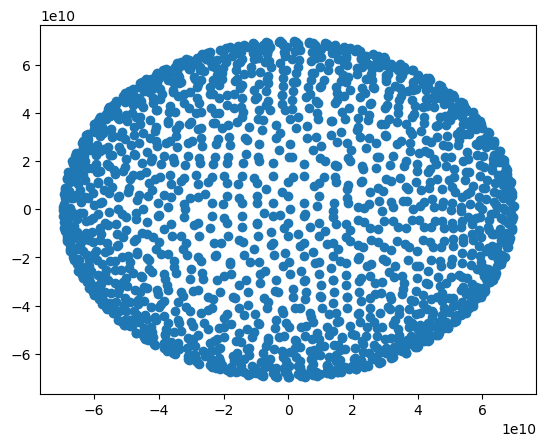

In [16]:
plt.figure()
plt.scatter(pm.centers[:, 0], pm.centers[:, 1])

In [19]:
pm.radius

1.0